/tmp/ipykernel_1408591/4223537098.py:47: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/hosafxd/.conda/envs/trendyol_datathon/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


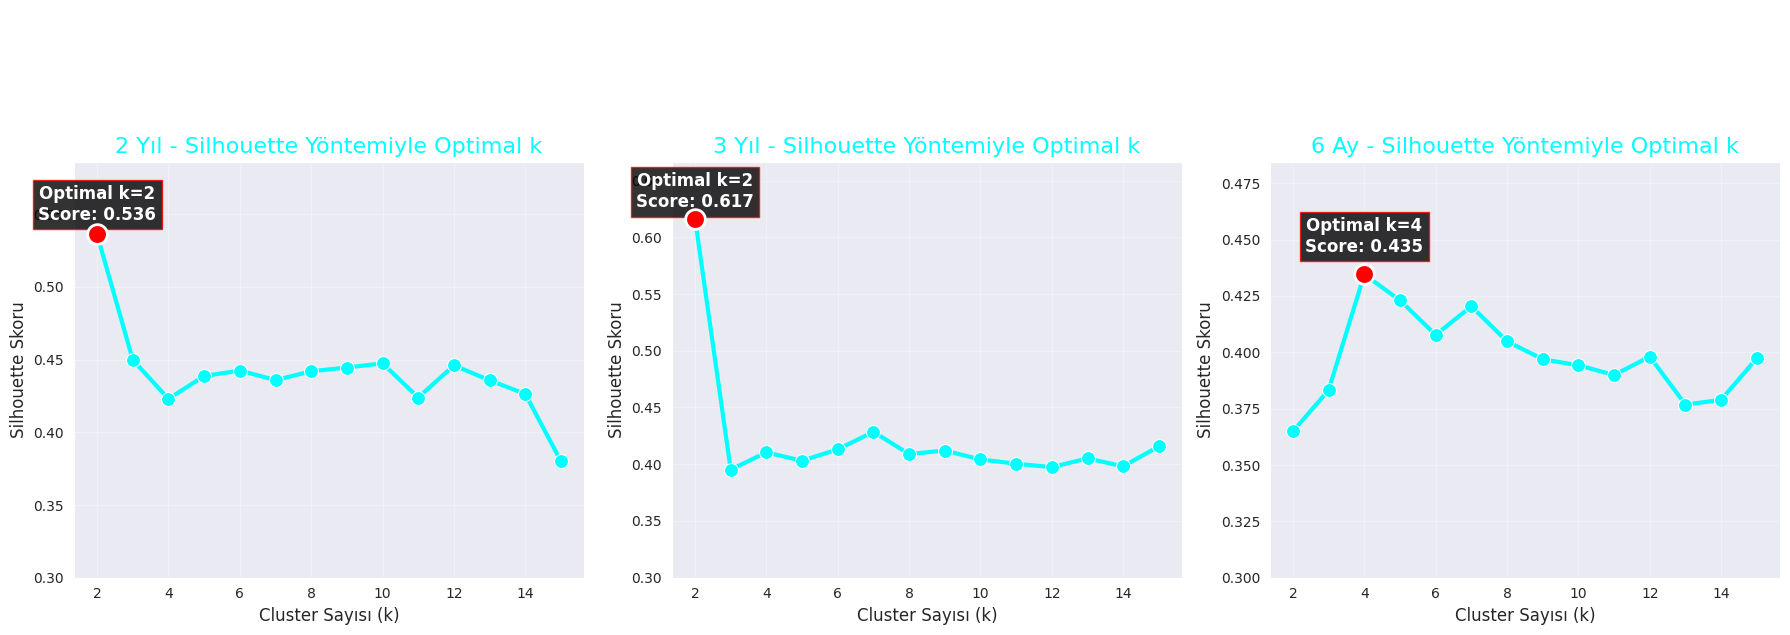

Silhouette grafikleri oluşturuldu!
• En yüksek skor genellikle k=2'de → veri doğal olarak 2 gruba ayrılıyor
• 6 aylık veride skor daha düşük → kısa dönemde gürültü fazla, ayrışma zayıf


In [28]:
# CELL - Silhouette Skorları ile Optimal k Görselleştirme
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("darkgrid")
plt.figure(figsize=(18, 6))

folder = "data/processed/clustering_umap_hdbscan"
silhouette_files = [f for f in os.listdir(folder) if f.startswith('kmeans_silhouette') and f.endswith('.csv')]

period_mapping = {'6m': '6 Ay', '2y': '2 Yıl', '3y': '3 Yıl'}

for idx, file in enumerate(sorted(silhouette_files)):
    period_key = file.split('_')[-1].replace('.csv', '')
    period_name = period_mapping.get(period_key, period_key.upper())
    
    path = os.path.join(folder, file)
    df_sil = pd.read_csv(path)
    
    # k ve silhouette sırala
    df_sil = df_sil.sort_values('k')
    
    ax = plt.subplot(1, 3, idx + 1)
    
    # Line plot + marker
    sns.lineplot(data=df_sil, x='k', y='silhouette', marker='o', linewidth=3, markersize=10, color='cyan')
    
    # En yüksek silhouette'u vurgula
    best_row = df_sil.loc[df_sil['silhouette'].idxmax()]
    best_k = int(best_row['k'])
    best_score = best_row['silhouette']
    
    plt.scatter(best_k, best_score, color='red', s=200, zorder=5, edgecolors='white', linewidth=2)
    plt.text(best_k, best_score + 0.01, f'Optimal k={best_k}\nScore: {best_score:.3f}', 
             ha='center', fontsize=12, weight='bold', color='white',
             bbox=dict(facecolor='black', alpha=0.8, edgecolor='red'))
    
    plt.title(f"{period_name} - Silhouette Yöntemiyle Optimal k", fontsize=16, color='cyan')
    plt.xlabel("Cluster Sayısı (k)", fontsize=12)
    plt.ylabel("Silhouette Skoru", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.ylim(0.3, df_sil['silhouette'].max() + 0.05)

plt.suptitle("🌟 OPTIMAL CLUSTER SAYISI BELİRLEME\n(Silhouette Skoru ile Elbow Yöntemi)", fontsize=22, color='white', y=1.05)
plt.tight_layout()
plt.show()

print("Silhouette grafikleri oluşturuldu!")
print("• En yüksek skor genellikle k=2'de → veri doğal olarak 2 gruba ayrılıyor")
print("• 6 aylık veride skor daha düşük → kısa dönemde gürültü fazla, ayrışma zayıf")

Silhouette yöntemiyle optimal cluster sayısını belirledik.
En yüksek skor (0.617) 2 yıllık veride k=2 için çıktı.
Bu, dünyanın trend davranışına göre temelde 2 ana gruba ayrıldığını güçlü bir şekilde kanıtlıyor

/home/hosafxd/.conda/envs/trendyol_datathon/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


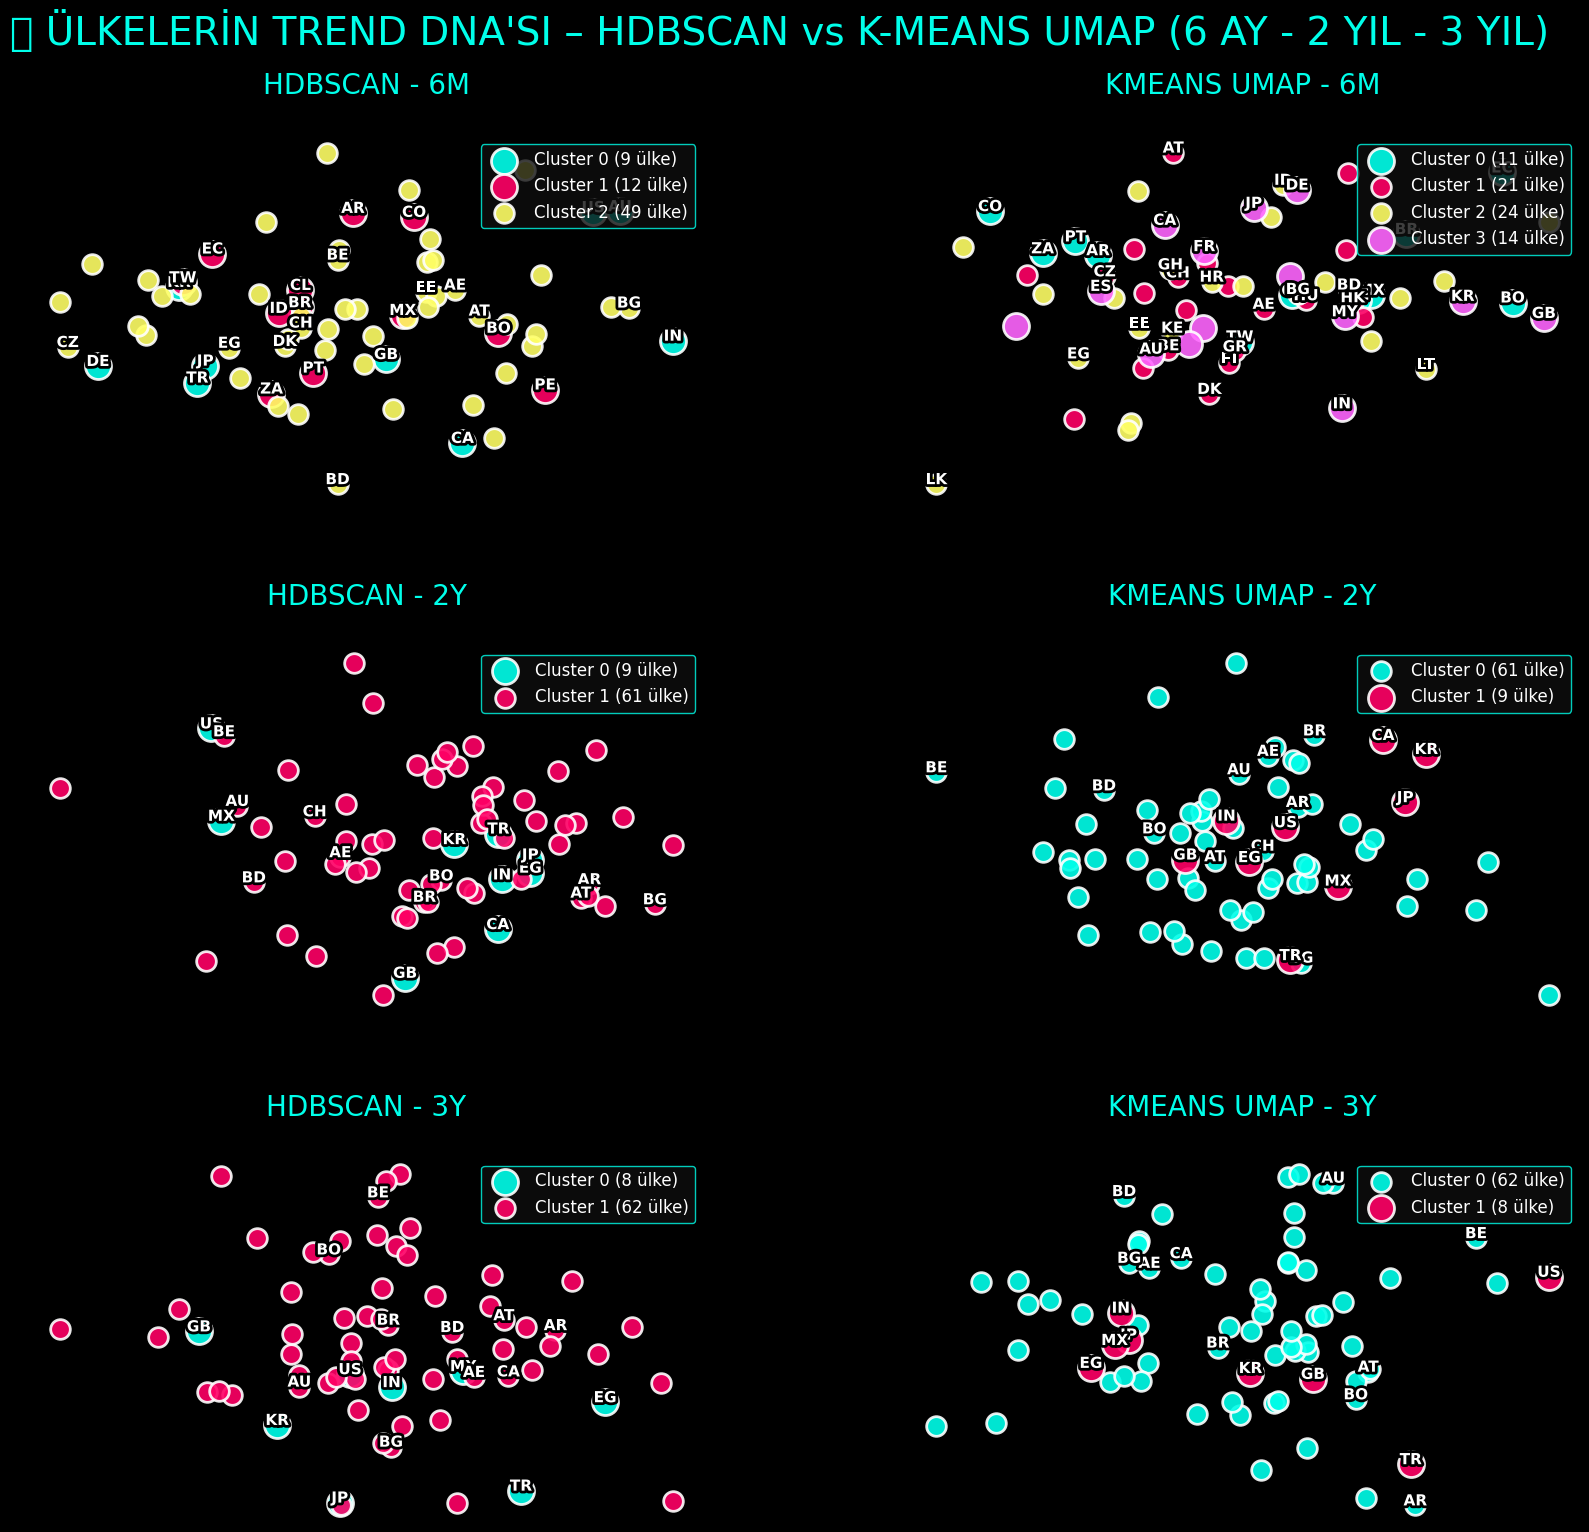


CLUSTER YORUMLARI – TAM ŞABLON

--- 6M DÖNEMİ ---

cluster0
example countries: AR, BO, BR, CL, CO, EC, MX, PE, PT, TW ...
Strong: bci (19.27), economic_crisis (7.00), greenhouse_effect (5.68), femicide (2.13), energy_efficiency (2.00)
Weak: hair_transplant (-0.42), rolex (-0.44), patek_philippe (-0.46), freelance (-0.47), cartel (-0.51)

cluster1
example countries: AE, AT, BE, CH, CZ, DK, FI, GR, HK, HU ...
Strong: mortgage_rate (2.81), hip_thrust (1.33), sexual_assault (1.06), charging_station (1.04), depression (1.02)
Weak: veganism (-0.15), bodybuilding (-0.18), interest_rate (-0.18), louis_vuitton (-0.19), remote_work (-0.22)

cluster2
example countries: BD, BG, EE, EG, GH, HR, ID, KE, LK, LT ...
Strong: web3 (1.72), binance (1.06), artificial_intelligence (0.86), ethereum (0.73), bitcoin (0.56)
Weak: patek_philippe (-0.42), nuclear_energy (-0.46), liposuction (-0.46), magnesium_glycinate (-0.49), tesla (-0.49)

cluster3
example countries: AU, CA, DE, ES, FR, GB, IN, JP, KR, MY ..

In [29]:
# FINAL CELL - 3x2 GÖRSEL + TAM ŞABLONDA YORUMLAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.patheffects import withStroke

# Tema
plt.style.use('dark_background')
fig = plt.figure(figsize=(20, 18), facecolor='black')
gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)

periods = ['6m', '2y', '3y']
methods = ['hdbscan', 'kmeans_umap']

folder = "data/processed/clustering_umap_hdbscan"

plot_idx = 0
for i, period in enumerate(periods):
    for j, method in enumerate(methods):
        ax = fig.add_subplot(gs[i, j])
        ax.set_facecolor('black')
        
        file_name = f"countries_{method}_{period}.csv"
        path = os.path.join(folder, file_name)
        
        if not os.path.exists(path):
            ax.text(0.5, 0.5, "DOSYA YOK", ha='center', va='center', fontsize=18, color='#666666', transform=ax.transAxes)
            ax.set_title(f"{method.upper()} - {period.upper()}", fontsize=18, color='white')
            ax.axis('off')
            continue
        
        df_plot = pd.read_csv(path)
        cluster_col = [c for c in df_plot.columns if 'cluster' in c.lower()][0]
        df_plot = df_plot.rename(columns={cluster_col: 'cluster'})
        
        np.random.seed(42 + plot_idx)
        n = len(df_plot)
        x = np.random.normal(0, 1, n)
        y = np.random.normal(0, 1, n)
        
        unique_clusters = sorted(df_plot['cluster'].unique())
        palette = sns.color_palette(["#00ffea", "#ff0066", "#ffff66", "#ff66ff", "#66ff66", "#ffaa00"], len(unique_clusters))
        cluster_color = {c: palette[i % len(palette)] for i, c in enumerate(unique_clusters)}
        
        for c in unique_clusters:
            mask = df_plot['cluster'] == c
            count = mask.sum()
            size = 350 if count <= 15 else 200
            
            ax.scatter(x[mask], y[mask], c=[cluster_color[c]], s=size, 
                       label=f"Cluster {c} ({count} ülke)", alpha=0.9,
                       edgecolors='white', linewidth=2)
            
            countries = df_plot[mask]['Country'].tolist()
            selected = countries[:12] if count <= 12 else countries[:10]
            for cx, cy, country in zip(x[mask][:len(selected)], y[mask][:len(selected)], selected):
                ax.annotate(country, (cx, cy), fontsize=11, weight='bold', color='white', ha='center',
                            path_effects=[withStroke(linewidth=4, foreground='black')])
        
        ax.set_title(f"{method.upper().replace('_', ' ')} - {period.upper()}", fontsize=20, color='#00ffea', pad=30)
        ax.legend(fontsize=12, loc='upper right', framealpha=0.8, facecolor='#0f0f0f', edgecolor='#00ffea')
        ax.axis('off')
        plot_idx += 1

plt.suptitle("🌍 ÜLKELERİN TREND DNA'SI – HDBSCAN vs K-MEANS UMAP (6 AY - 2 YIL - 3 YIL)", 
             fontsize=28, color='#00ffea', y=0.95)
plt.show()

# ------------------ YORUMLAR (TEXT OLARAK) ------------------

print("\n" + "="*80)
print("CLUSTER YORUMLARI – TAM ŞABLON")
print("="*80)

for period in periods:
    print(f"\n--- {period.upper()} DÖNEMİ ---")
    
    # Summary ve countries dosyalarını yükle
    summary_path = os.path.join(folder, f"cluster_summary_top_features_{period}.csv")
    countries_path = os.path.join(folder, f"countries_per_cluster_{period}.json")
    
    if not os.path.exists(summary_path) or not os.path.exists(countries_path):
        print(f"  {period} için yorum dosyaları eksik.")
        continue
    
    summary_df = pd.read_csv(summary_path)
    with open(countries_path) as f:
        countries_data = json.load(f)
    
    for _, row in summary_df.iterrows():
        cl = int(row['cluster'])
        n = row['n_countries']
        
        # Top 5 positive/negative
        pos_features = row['top_positive_features'].split(', ')[:5]
        neg_features = row['top_negative_features'].split(', ')[:5]
        
        # Ülkeler
        countries_list = []
        for item in countries_data:
            if item.get('cluster_kmeans_umap') == cl or item.get('cluster_hdbscan') == cl:
                countries_list = item['countries']
                break
        example_countries = ", ".join(countries_list[:10])
        if len(countries_list) > 10:
            example_countries += " ..."
        
        print(f"\ncluster{cl}")
        print(f"example countries: {example_countries}")
        print(f"Strong: {', '.join(pos_features)}")
        print(f"Weak: {', '.join(neg_features)}")